In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=2000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

766

## Perform API Calls
1. Perform a weather check on each city using a series of successive API calls
2. Include a print log of each city as it's being processed (with the city number and city name)

In [3]:
# URL building blocks
base_url = 'http://api.openweathermap.org/data/2.5/weather'
params = {
    'q': '',
    'units': 'imperial',
    'appid': weather_api_key
}

# Blank lists to append to during the for loop
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
cities_found = []

print('Beginnig Data Retrieval')
print('---------------------------')

# For loop to go through each of the cities in the list
for city in cities:
    index = cities.index(city)
    # Updating 'q' in the parameters dictionary for each city in the list
    params['q'] = city
    
    # Obtaining the response for each city in json format using the base url and parameters
    response = requests.get(base_url, params=params).json()
    
    # Saving relevant information from the response (if applicable)
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        cities_found.append(response["name"])
        print(f'Processing Record {index} | {city}')
    except: 
        print('City not found. Skipping...')
        pass

print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')

Beginnig Data Retrieval
---------------------------
Processing Record 0 | antofagasta
Processing Record 1 | hithadhoo
Processing Record 2 | college
Processing Record 3 | ushuaia
Processing Record 4 | barrow
Processing Record 5 | castro
Processing Record 6 | klaksvik
Processing Record 7 | mogok
Processing Record 8 | hilo
City not found. Skipping...
Processing Record 10 | pevek
Processing Record 11 | avarua
Processing Record 12 | pangody
Processing Record 13 | ormara
Processing Record 14 | raudeberg
Processing Record 15 | yellowknife
Processing Record 16 | bredasdorp
City not found. Skipping...
Processing Record 18 | hasaki
Processing Record 19 | itarema
Processing Record 20 | kahului
Processing Record 21 | tuktoyaktuk
Processing Record 22 | general pico
Processing Record 23 | mahon
City not found. Skipping...
Processing Record 25 | marquette
Processing Record 26 | tasiilaq
Processing Record 27 | mataura
Processing Record 28 | awbari
City not found. Skipping...
Processing Record 30 | mar

Processing Record 252 | roald
Processing Record 253 | dubbo
Processing Record 254 | menongue
Processing Record 255 | yulara
Processing Record 256 | bambous virieux
Processing Record 257 | narsaq
City not found. Skipping...
Processing Record 259 | honningsvag
Processing Record 260 | vao
Processing Record 261 | bayeux
City not found. Skipping...
Processing Record 263 | coihaique
Processing Record 264 | osorno
Processing Record 265 | mount gambier
Processing Record 266 | talnakh
Processing Record 267 | yumen
Processing Record 268 | lebu
Processing Record 269 | filadelfia
Processing Record 270 | sorland
Processing Record 271 | glendive
Processing Record 272 | praia
Processing Record 273 | flinders
Processing Record 274 | bandarbeyla
Processing Record 275 | tabas
Processing Record 276 | san pedro
Processing Record 277 | genhe
City not found. Skipping...
Processing Record 279 | biskamzha
Processing Record 280 | dinan
Processing Record 281 | sterlibashevo
Processing Record 282 | butaritari
Pr

Processing Record 503 | burns lake
Processing Record 504 | benguela
Processing Record 505 | nhulunbuy
Processing Record 506 | bama
Processing Record 507 | zhuhai
Processing Record 508 | paamiut
Processing Record 509 | akita
Processing Record 510 | besikduzu
Processing Record 511 | khingansk
Processing Record 512 | ketchikan
Processing Record 513 | emerald
Processing Record 514 | havre-saint-pierre
Processing Record 515 | morozovsk
Processing Record 516 | miragoane
Processing Record 517 | puerto escondido
Processing Record 518 | tambura
Processing Record 519 | oyem
Processing Record 520 | kidal
Processing Record 521 | gizo
Processing Record 522 | aljezur
City not found. Skipping...
Processing Record 524 | ambovombe
Processing Record 525 | north bend
Processing Record 526 | luorong
Processing Record 527 | port-gentil
Processing Record 528 | algiers
Processing Record 529 | waingapu
Processing Record 530 | lagos
Processing Record 531 | yaan
City not found. Skipping...
Processing Record 533

Processing Record 752 | hamada
Processing Record 753 | providencia
Processing Record 754 | grieskirchen
Processing Record 755 | batangafo
Processing Record 756 | tual
Processing Record 757 | gunnedah
City not found. Skipping...
Processing Record 759 | inuvik
Processing Record 760 | shenjiamen
Processing Record 761 | marsabit
Processing Record 762 | palmerston
Processing Record 763 | moscow
Processing Record 764 | moura
Processing Record 765 | hendek
---------------------------
Data Retrieval Complete
---------------------------


## Convert Raw Data to DataFrame
Export the data into a .csv and display the DataFrame.

In [4]:
# Turning the lists of weather data into a DataFrame
weather_df = pd.DataFrame({'City': cities_found,
                           'Lat': lat,
                           'Lng': lng,
                           'Max Temp': max_temp,
                           'Humidity': humidity,
                           'Cloudiness': cloudiness,
                           'Wind Speed': wind_speed,
                           'Country': country,
                           'Date': date
})

# Removing duplicate cities, if any
weather_df = weather_df.drop_duplicates(['City'])

# Exporting the DataFrame into a csv
weather_df.to_csv("Output/cities.csv")

In [5]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Antofagasta,-23.6500,-70.4000,58.28,83,12,2.89,CL,1650781347
1,Hithadhoo,-0.6000,73.0833,84.60,72,100,5.30,MV,1650781434
2,College,64.8569,-147.8028,42.75,54,75,0.00,US,1650781435
3,Ushuaia,-54.8000,-68.3000,40.66,75,20,12.66,AR,1650781336
4,Barrow,71.2906,-156.7887,12.22,92,100,9.22,US,1650781435


In [7]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,7.070000e+02
mean,18.844551,18.213588,62.478996,70.251768,58.592645,7.514371,1.650782e+09
std,32.492987,88.470261,19.954110,22.286227,39.472777,5.378519,1.041429e+02
min,-54.800000,-175.200000,-5.490000,1.000000,0.000000,0.000000,1.650781e+09
25%,-7.844000,-60.292300,48.815000,59.000000,18.000000,3.600000,1.650782e+09
50%,21.346900,20.916700,65.890000,75.000000,75.000000,6.530000,1.650782e+09
75%,46.498200,99.834100,77.030000,87.000000,99.000000,10.360000,1.650782e+09
max,78.218600,179.316700,106.340000,100.000000,100.000000,41.430000,1.650782e+09


# Inspect the data and remove the cities where humidity > 100%

In [8]:
# Finding all row indices where Humidity > 100
high_humidity = weather_df[weather_df['Humidity'].astype(int) > 100].index
high_humidity

# No cities have humidity > 100

Int64Index([], dtype='int64')

# Plotting the Data

In [9]:
# Creating a function to plot the data with less code
def scatterplot(y, x=weather_df['Lat']):
    # Building the scatter plot base
    plt.grid(True)
    
    # Determining appropriate y-axis values + adding a title and axis labels
    if y == 'Max Temp':
        y_axis = weather_df['Max Temp']
        plt.title('City Latitude vs. Max Temperature (4/23/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Max Temperature (F)')
    elif y == 'Humidity':
        y_axis = weather_df['Humidity']
        plt.title('City Latitude vs. Humidity (4/23/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Humidity (%)')
    elif y == 'Cloudiness':
        y_axis = weather_df['Cloudiness']
        plt.title('City Latitude vs. Cloudiness (4/23/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Cloudiness (%)')
    elif y == 'Wind Speed':
        y_axis = weather_df['Wind Speed']
        plt.title('City Latitude vs. Wind Speed (4/23/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Wind Speed (mph)')
    
    # Plotting the appropriate data
    plt.scatter(x, y_axis, marker='o')

## Latitude vs. Temperature Plot

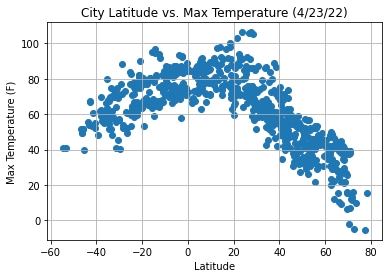

In [10]:
scatterplot('Max Temp')

# Saving the scatterplot as a png
plt.savefig("Output/LatitudeMaxTemperature.png")

'City Latitude vs. Max Temperature (4/23/22)' shows the maximum temperature, in Fahrenheit, for each city according to its latitude.

## Latitude vs. Humidity Plot

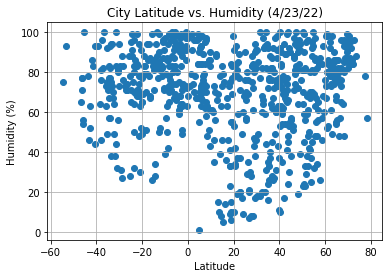

In [11]:
scatterplot('Humidity')

# Saving the scatterplot as a png
plt.savefig("Output/LatitudeHumidity.png")

'City Latitude vs. Humidity (4/23/22)' shows the humidity, as a percentage, for each city according to its latitude.

## Latitude vs. Cloudiness Plot

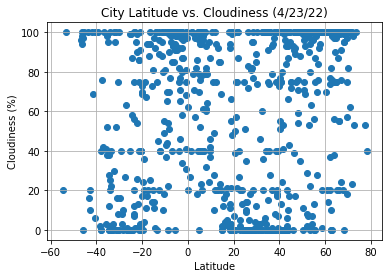

In [12]:
scatterplot('Cloudiness')

# Saving the scatterplot as a png
plt.savefig("Output/LatitudeCloudiness.png")

'City Latitude vs. Cloudiness (4/23/22)' shows the cloudiness, as a percentage, for each city according to its latitude.

## Latitude vs. Wind Speed Plot

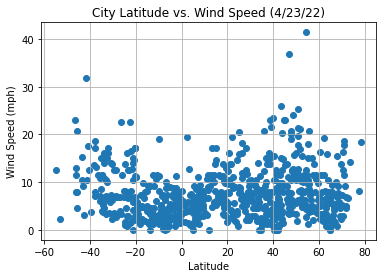

In [13]:
scatterplot('Wind Speed')

# Saving the scatterplot as a png
plt.savefig("Output/LatitudeWindSpeed.png")

'City Latitude vs. Wind Speed (4/23/22)' shows the wind speed, in miles per hour, for each city according to its latitude.

# Linear Regression

In [14]:
# Creating a function to plot the data with less code
def regression(x, y):
    # Determining latitude values based on 'Northern' or 'Southern' hemisphere input
    if x == 'Northern':
        new = weather_df.loc[weather_df['Lat'] >= 0]
        x_axis = new['Lat']
        # Annotation x coordinate
        x_annotate = 35
    elif x == 'Southern':
        new = weather_df.loc[weather_df['Lat'] < 0]
        x_axis = new['Lat']
        # Annotation x coordinate
        x_annotate =-35
    
    # Determining appropriate y-axis values + adding a title and axis labels
    if y == 'Max Temp':
        y_axis = new['Max Temp']
        plt.title(f'{x} Latitudes vs. Max Temperature (4/23/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Max Temperature (F)')
        # Annotation y coordinate
        y_annotate = 90
    elif y == 'Humidity':
        y_axis = new['Humidity']
        plt.title(f'{x} Latitudes vs. Humidity (4/23/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Humidity (%)')
        # Annotation y coordinate
        y_annotate = 30
    elif y == 'Cloudiness':
        y_axis = new['Cloudiness']
        plt.title(f'{x} Latitudes vs. Cloudiness (4/23/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Cloudiness (%)')
        # Annotation y coordinate
        y_annotate = 80
    elif y == 'Wind Speed':
        y_axis = new['Wind Speed']
        plt.title(f'{x} Latitudes vs. Wind Speed (4/23/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Wind Speed (mph)')
        # Annotation y coordinate
        y_annotate = 22

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    # Making regression line and annotation label
    regress_values = x_axis*slope + intercept
    line_eq = "y =" + str(round(slope,2)) + 'x +' + str(round(intercept,2))
    print(f'The r-value is: {rvalue**2}')
    
    # Plotting scatter plot and regression line (with annotation)
    plt.scatter(x_axis, y_axis, marker='o')
    plt.plot(x_axis, regress_values,'r-')
    plt.annotate(line_eq, (x_annotate, y_annotate), fontsize=15, color='r')

## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7464048682671826


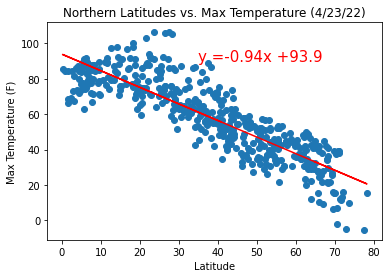

In [15]:
regression('Northern', 'Max Temp')

## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.45183713778519924


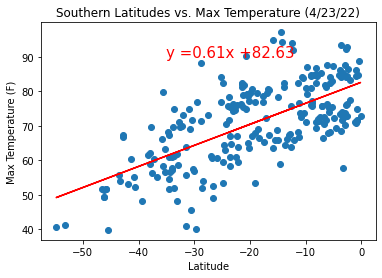

In [16]:
regression('Southern', 'Max Temp')

These two plots analyze the relationship between latitudes and maximum temperature, in Fahrenheit, using linear regression. According to the graphs, maximum temperature increases as the latitude approaches 0°. This relationship is more strongly correlated in the northern hemisphere, where the r-value is approximately 0.75 (as opposed to approximately 0.45 in the southern hemisphere). The stronger correlation is visually represented by a tighter adherence to the red regression line.

## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02962992452551439


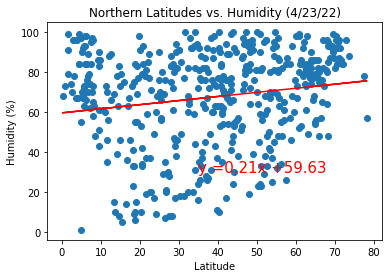

In [17]:
regression('Northern', 'Humidity')

## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.043407768567092234


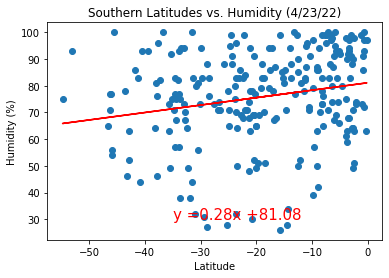

In [18]:
regression('Southern', 'Humidity')

These two plots analyze the relationship between latitudes and humidity, as a percentage, using linear regression. The wide spread of the scatter plots suggests a weak linear correlation between the metrics, if any. Both hemispheres have an r-value of less than 0.05, proving the very weak correlation. On average, the southern hemisphere appears to have a higher level of humidity.

## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03977855726066335


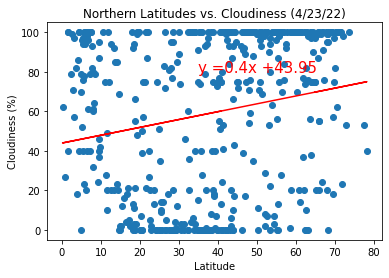

In [19]:
regression('Northern', 'Cloudiness')

## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11972495928321285


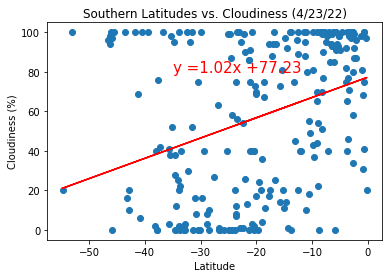

In [20]:
regression('Southern', 'Cloudiness')

These two plots analyze the relationship between latitudes and cloudiness, as a percentage, using linear regression. Each hemisphere displays a very weak linear correlation, with data points more congreagated at the extreme (near 0% and 100%) levels of humidity. Their r-values of around 0.1 and below confirm the weak relationship.

## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.009438467970724262


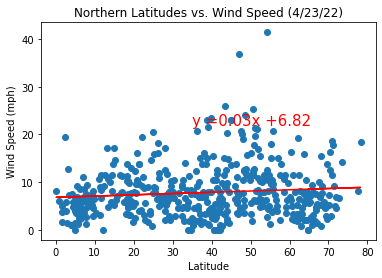

In [21]:
regression('Northern', 'Wind Speed')

## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.2100900867263257


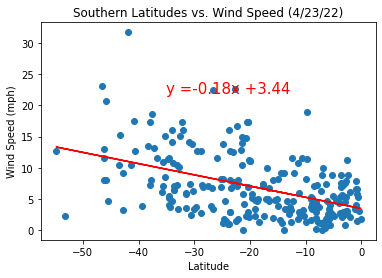

In [22]:
regression('Southern', 'Wind Speed')

These plots analyze the relationship between latitudes and wind speeds, in miles per hour, using linear regression. Although the southern hemisphere has a higher r-value (approximately 0.21) than the northern hemisphere (below 0.01), neither hemisphere is representative of even a moderate linear relationship. Based on the spread of data, the southern hemisphere also seems to have a larger standard deviation. 